<a href="https://colab.research.google.com/github/Jeevana023/codesoft-technologies/blob/main/Copy_of_Untitled62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features (X) shape: (150, 4)
Target (y) shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000        

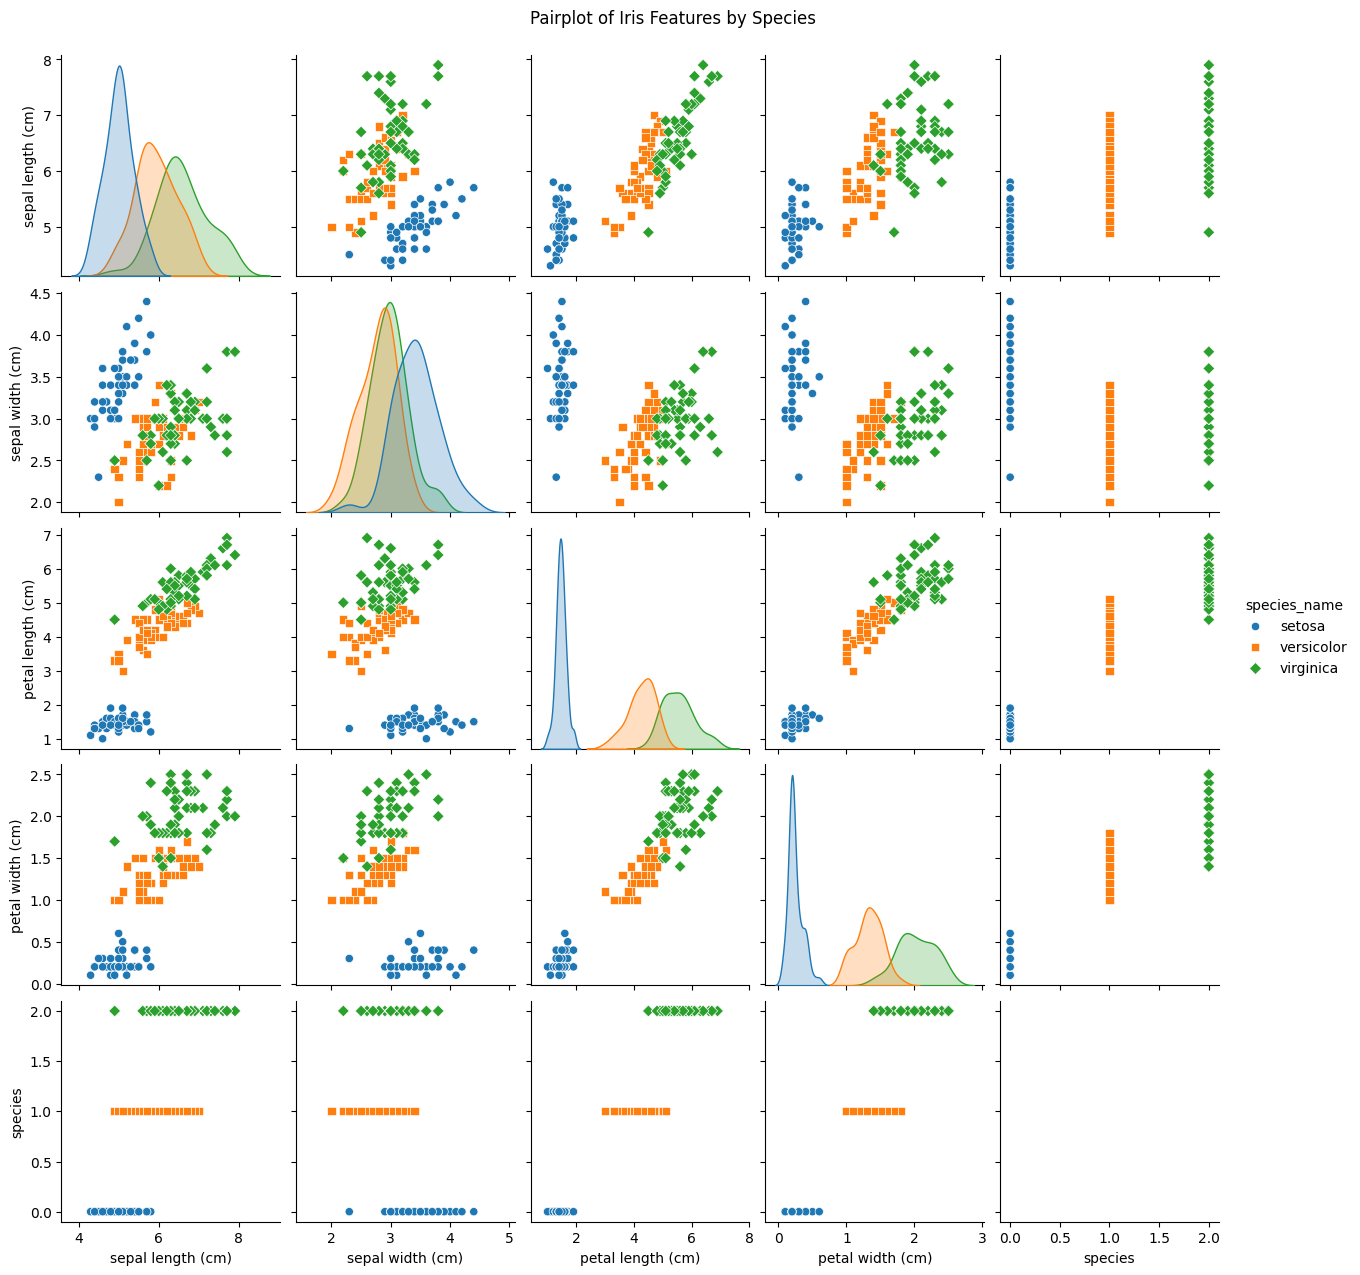

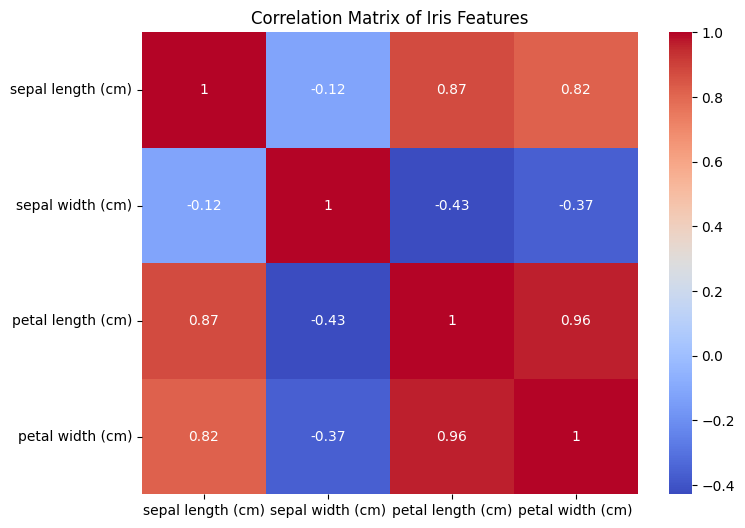


Training set shape (X_train, y_train): (120, 4) (120,)
Testing set shape (X_test, y_test): (30, 4) (30,)

K-Nearest Neighbors model trained.

Accuracy of KNN model: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


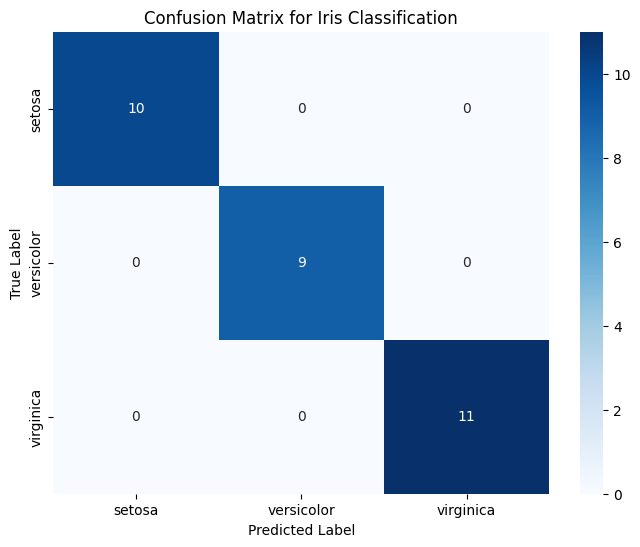


New flower measurements: [5.  3.5 1.3 0.2]
Predicted species: setosa

New flower measurements: [6.5 3.  5.5 2. ]
Predicted species: virginica


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load the Dataset ---
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target labels (0: setosa, 1: versicolor, 2: virginica)
target_names = iris.target_names # Names of the target classes

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Feature names:", iris.feature_names)
print("Target names:", target_names)

# Create a DataFrame for better viewing and initial exploration
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = df['species'].map({i: name for i, name in enumerate(target_names)})
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Description:")
print(df.describe())
print("\nSpecies distribution:")
print(df['species_name'].value_counts())

# --- 2. Exploratory Data Analysis (EDA) ---
# Pairplot to visualize relationships between features and species
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features by Species", y=1.02) # Adjust title position
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Iris Features")
plt.show()

# --- 3. Data Preprocessing ---
# Split data into training and testing sets
# test_size=0.2 means 20% of data will be used for testing
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

# Feature Scaling (Optional but good practice for some algorithms like KNN)
# StandardScaler scales features to have mean 0 and variance 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Model Training (K-Nearest Neighbors) ---
# Initialize the KNN model
# n_neighbors is a hyperparameter - you can experiment with different values
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

print("\nK-Nearest Neighbors model trained.")

# --- 5. Model Prediction ---
y_pred = knn.predict(X_test_scaled)

# --- 6. Model Evaluation ---
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN model: {accuracy:.4f}")

# Classification Report
# Provides precision, recall, f1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
# Shows how many samples from each class were correctly/incorrectly classified
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

# --- 7. Make a New Prediction (Example) ---
# Let's say we have a new flower with these measurements:
# SepalLength=5.0, SepalWidth=3.5, PetalLength=1.3, PetalWidth=0.2
new_flower_measurements = np.array([[5.0, 3.5, 1.3, 0.2]])

# Scale the new data using the *same* scaler fitted on training data
new_flower_scaled = scaler.transform(new_flower_measurements)

# Predict the species
predicted_species_index = knn.predict(new_flower_scaled)
predicted_species_name = target_names[predicted_species_index[0]]

print(f"\nNew flower measurements: {new_flower_measurements[0]}")
print(f"Predicted species: {predicted_species_name}")

# Another example:
new_flower_measurements_2 = np.array([[6.5, 3.0, 5.5, 2.0]])
new_flower_scaled_2 = scaler.transform(new_flower_measurements_2)
predicted_species_index_2 = knn.predict(new_flower_scaled_2)
predicted_species_name_2 = target_names[predicted_species_index_2[0]]
print(f"\nNew flower measurements: {new_flower_measurements_2[0]}")
print(f"Predicted species: {predicted_species_name_2}")